# M3C Financial Series Visualization

Plotting the first 50 monthly financial time series from M3 Competition dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
excel_file = 'M3C.xls'
sheet_name = "M3Month"
category = "FINANCE"

data = pd.read_excel(excel_file, sheet_name=sheet_name)
print(f"Loaded {sheet_name}")

# Filter for financial category
category_data = data[data['Category'].str.strip() == category]
print(f"Found {len(category_data)} financial series")

# Get first 50 series (or all if less than 50)
n_series = min(100, len(category_data))
print(f"Plotting first {n_series} series")

Loaded M3Month
Found 145 financial series
Plotting first 100 series


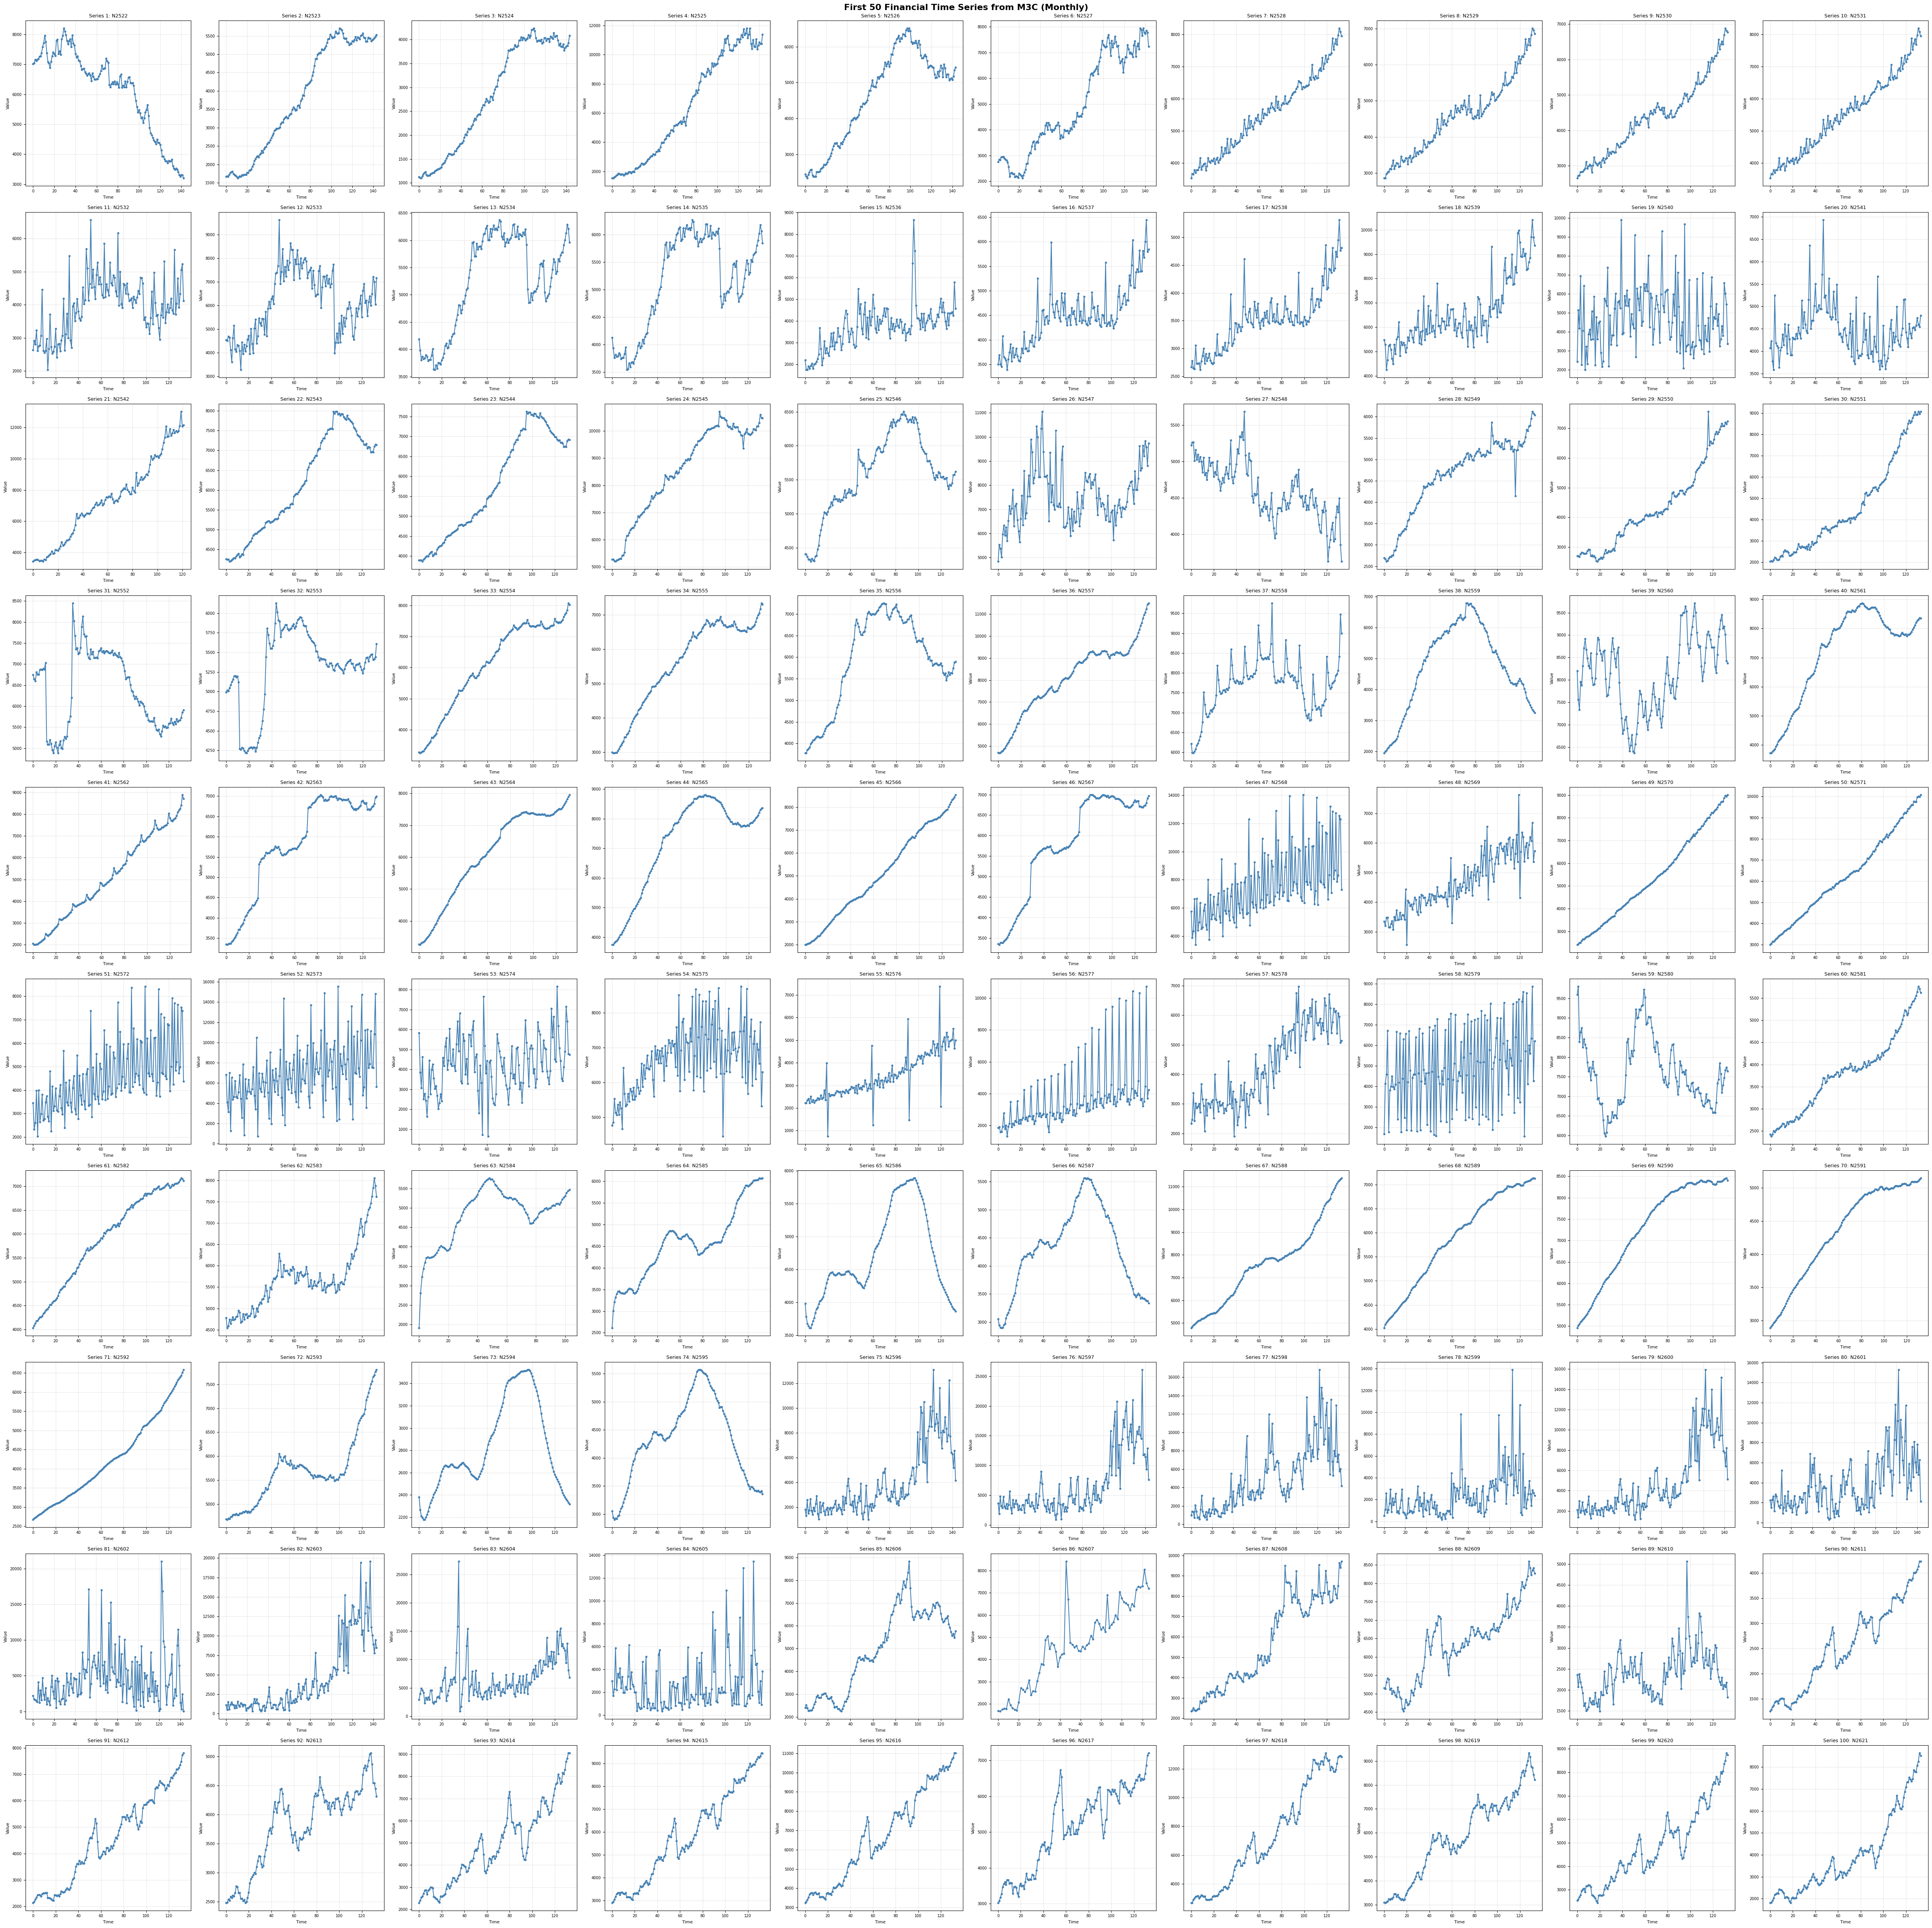

In [11]:
# Create a large subplot grid for 50 series
fig, axes = plt.subplots(10, 10, figsize=(50, 50))
fig.suptitle('First 50 Financial Time Series from M3C (Monthly)', fontsize=16, fontweight='bold', y=0.995)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each series
for idx in range(n_series):
    # Extract series (start from column 6 onwards, skip NaN)
    series = category_data.iloc[idx, 6:].dropna().astype(float)
    series_id = category_data.iloc[idx, 0]  # Get series ID from first column
    
    # Plot on corresponding subplot
    axes[idx].plot(series.values, linewidth=1.5, color='steelblue', marker='o', markersize=3)
    axes[idx].set_title(f'Series {idx+1}: {series_id}', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlabel('Time', fontsize=8)
    axes[idx].set_ylabel('Value', fontsize=8)
    axes[idx].tick_params(labelsize=7)

# Hide any unused subplots
for idx in range(n_series, 100):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()